**Name**: Brandon Loptman

**Total Score**: 20/20

Code Tests:

Completed Tests: 3/3 

Tests Explained: 2/2

Application to Physical Systems Modeling:
8/8

General:

Run without problems: 1/1

Correct structure: 1/1

Logical flow: 1/1

Good graphical representaions: 3/3

Graphs have axes, labels, ticks, titles, etc.: 1/1 

**Comments**:



**Description**:

Code Tests

(3 pts) If code tests are suggested, all such tests are completed.  If code tests aren’t suggested, student has articulated their own code tests and executed those tests to show that code is working properly in at least some small number of obvious cases.  The more robust the code tests are, the better.

(2 pts) All code tests are explained in complete sentences in text cells (along with any relevant mathematics).  There is a reasonable amount of explanation of how one knows that the code tests have been passed.

Application of Code to Physical Systems Modeling

(8 pts) Notebook contains a mixture of explanation text in complete sentences (with math where appropriate) and graphs/other visual representations illustrating how the computer model exhibits the relevant phenomena predicted by the mathematical model of the system.  All prompts have been answered.

General

(1 pts) The whole notebook can be re-started and re-run without halting due to any coding errors.

(1 pts) The notebook has the correct general structure (code tests placed in the beginning and application of code to analysis of relevant physical systems after).

(1 pts) Flow of notebook is logical, clear, and concise.

(3 pts) Graphical/visual representations are used to concisely illustrate results of code tests and simulations.

(1 pts) All graphs with axes have labels on axes with units and tick marks where appropriate.


# Project 2: Numerical Linear Algebra and Quantum Mechanics

In [ ]:
import numpy as np
from scipy.stats import unitary_group
from scipy.special import factorial
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
def jacobi_rotation(A,j,k):
  """ Computes the Jacobi rotation matrix J for the j,kth and k,jth entry of A. 

  Args:
    A (ndarray): Real n x n symetric matrix
    j (int): Index of row of A 
    k (int): Index of colum of A 

  Returns: 
    A_transformed (ndarray): Real n x n symetric matrix thats j,kth and k,jth entries are zero. Similar to A
    J (ndarray): Real n x n rotation matrix that transforms A into A_transform via a similarity transformation
  """
  if A[j,k] != 0:
    tau = (A[k,k] - A[j,j])/(2*A[j,k])
    if tau >= 0:
      t = 1/(tau + np.sqrt(1 + (tau**2)))
    else:
      t = 1/(tau - np.sqrt(1 + (tau**2)))
    c = 1/np.sqrt(1 + (t**2))
    s = t*c
  else:
    c = 1
    s = 0
  dim = np.shape(A)[0]
  J = np.identity(dim)
  J[j,j] = c
  J[j,k] = s
  J[k,j] = -s
  J[k,k] = c

  AJ = np.matmul(A,J)
  J_t = np.transpose(J)
  A_transformed = np.matmul(J_t,AJ)
  return A_transformed, J

def off(A):
  """ Computes the function off(A) (as definded in the assignment instructions) for A

  Args:
    A (ndarray): A real matrix of any dimension n x m 

  Returns:
    off (float): Value of the function off(A)
  """
  sum = 0
  for i in range(np.shape(A)[0]):
    for j in range(np.shape(A)[0]):
      if i != j:
        sum += A[i,j]**2
  off = np.sqrt(sum)
  return off

def real_eigen(A,tolerance):
  """Computes the eigenvalues and eigenvectors of A

  Args:
    A (ndarray): Real n x n symetric matrix
    tolerance (float): the relative precison 

  Returns:
    d (ndarray): Numpy array of eigenvalues of A
    R (ndarray): n x n orthogonal matrix of the eigenvectors of A where the eigenvector and its correspoding eigenvalue share the same column index
  """
  dim = np.shape(A)[0]
  R = np.identity(dim)
  delta = tolerance*np.linalg.norm(A)
  
  while(off(A) > delta):
    
    for p in range(dim-1):
      for q in range(p+1,dim):
        
        A, J = jacobi_rotation(A,p,q)
        R = np.matmul(R,J)
  
  d = A.diagonal()
  
  return d,R

def complex_eigen(H,tolerance):
  """Computes the eigenvalues and eigenvectors of H

  Args:
    H (ndarray): n x n Hermitian matrix
    tolerance (float): the relative precison 
  
  Returns:
    dd_new (ndarray): Numpy array of the eigenvalues of H
    U (ndarray): n x n unitary matrix of the eigenvectors of H where the eigenvector and it's corresponding eigenvalue share the same column index
  """
  dim = np.shape(H)[0]
  #print(dim)
  
  S = np.real(H)
  A = np.imag(H)
  
  B = np.block([[S,-A],[A,S]])
  
  #print(S)
  #print(A)
  #print(B)
  
  dd,R = real_eigen(B,tolerance)
  #print(dd)
  #print(R)
  #print(dd)
  #print(R)
  #print(" ")
  
  #dd = np.sort(dd)
  #d = dd[::2]

  dd_indices = np.argsort(dd)
  dd_indices = dd_indices[::2]

  dd_new = np.zeros(dim)
  R_new = np.zeros((2*dim,dim))

  for i in range(dim):
    dd_new[i] = dd[dd_indices[i]]
    R_new[:,i] = R[:,dd_indices[i]]
    #print(R_new)

  #R = R[:,::2]
  #print(R)
  #print(" ")
  
  u_list = R_new[:dim,:]
  v_list = R_new[dim:,:]
  
  #print("u's:\n", u_list)
  #print(" ")
  #print("v's:\n", v_list)
  #print(" ")
  
  U = u_list + v_list*1j
  #print(R_prime)
  
  return dd_new,U

def hermitian_eigensystem(H,tolerance):
  """Returns the eigenvalues and eigenvectors of H

  Args:
    H (ndarray): n x n hermitian matrix
    tolerance (float): the relative precison 

  Returns:
    d (ndarray): Numpy array of the eigenvalues of H
    U (ndarray): n x n unitary matrix of the eigenvectors of H where the eigenvector and it's corresponding eigenvalue share the same column index (ndarray)
  """
  d,U = complex_eigen(H,tolerance)
  return d, U 

def H_perturbed(d,lmbda):
  """Returns the Hamiltonian for the anharmonic oscillator

  Args:
    d (int): dimension of the Hamiltonian
    lmbda (float): value of the constant lambda for the anharmonoc oscillator

  Returns:
    H (ndarray): d x d Hamiltonian matrix repersentation for the anharmonic oscillator 
  """
  dim = d

  index = np.arange(dim)
  H0 = np.zeros((dim,dim))
  H0[index,index] = (index + .5)

  #print(H0)

  x4 = np.zeros((dim,dim))

  for n in range(dim):
    for m in range(dim):
      if(n == m):
        x4_term1 = (6*n**2 + 6*n + 3) * .25
        x4[n,m] = x4_term1
      if(n == m-2):
        x4_term2 = np.sqrt((n+1)*(n+2))*(n + 3/2)
        x4[n,m] = x4_term2
      if(n == m+2):
        x4_term3 = np.sqrt((n-1)*n)*(n - .5)
        x4[n,m] = x4_term3
      if(n == m-4):
        x4_term4 = np.sqrt((n+1)*(n+2)*(n+3)*(n+4)) * .25
        x4[n,m] = x4_term4
      if(n == m +4):
        x4_term5 = np.sqrt((n-3)*(n-2)*(n-1)*n) * .25
        x4[n,m] = x4_term5
        
  #print(x4)

  h_lambda = lmbda
  H = H0 + h_lambda*x4

  return H

def psi(v):
  """Returns the values of the wavefunction for the anharmonic oscillator for a specified state

  Args:
    v (ndarray): coefficents of the anharmonic oscillator state (aka the eigenvector corresponding to that state)

  Returns:
    innerFunction (function): function that returns the value of the wavefunction specified x values
  """
  def innerFunction(x):
    """Returns the values of the wavefunction at specified x values

    Args:
      x (ndarray): Numpy array of x positions

    Return:
      psi (ndarray): Numpy array of the values of the wave function for the specified anharomic oscillator state
    """
    coeffs = np.zeros(np.size(v))
    for i in range(np.size(v)):
      a = (2**i * factorial(i) * np.sqrt(np.pi))**-.5
      coeffs[i] = a * np.real(v[i])

    psi = np.polynomial.hermite.hermval(x,coeffs)
    psi = np.exp((-x**2)/2)*psi
    return psi
  return innerFunction

## Initial Testing

To begin, let's test that these functions implemented above work properly for matrices of small dimensions. 

In [ ]:
A = np.array([[5,0],[0,6]])
d, R = real_eigen(A,.01)

print(d)
print("")
print(R)

[5 6]

[[1. 0.]
 [0. 1.]]


In [ ]:
B = np.array([[1,2,0],[2,4,0],[0,0,3]])

d, R = real_eigen(B,.01)

print(d)
print("")
print(R)

[0. 5. 3.]

[[ 0.89442719  0.4472136   0.        ]
 [-0.4472136   0.89442719  0.        ]
 [ 0.          0.          1.        ]]


In [ ]:
C = np.array([[1,1-1j],[1+1j,-1]])

d, R = hermitian_eigensystem(C,.01)

print(d)
print("")
print(R)

[-1.73205081  1.73205081]

[[-0.32254835-0.3275476j   0.20084772-0.86506377j]
 [-0.0068291 +0.88804758j  0.39015068-0.24311995j]]


It is easy to verify the accuracy of the above results by hand or by using Mathematica's `Eigensystem` function.

## Code Tests



### Checking Eigenvalues

* To begin, we want to check that the function `hermitian_eigensystem` indeed calculates the correct eigenvalues of a hermitian matrix given to it. To do this we can feed `hermitian_eigensystem` hermitian matricies with known eignevalues and verify the eigenvalues returned by the function match (so some precison) these known eigenvalues.  

* How can we generate hermitian matricies with known eigenvalues? One way is to consider $n \times n$ diagonal matricies. It is easy to see that the eigenvalues for such a matrix are just the entries along the main diagonal. Additionally, such a matrix is also hermitian. This is all great news, except for the fact that the matrix is already digonalized before we apply our numerical algorithm! Diagonalizing an already diagonal matrix can hardly be called a test.  

* Is there a way to take the known eigenvalue property of a diagonal matrix $D$ and put it into a non-diagonal hermitian matrix $H$? Yes, there is! If we perform the similarity transform $U^{-1}DU = H$, where $U$ is a $n \times n$ unitary matrix, then $H$ will have the same eigenvalues of $D$.

* This works for two reasons. The first is that similar matricies share the same eigenvalues. We can proof this by looking at the characteristic polynomial of both sides and see that they are the same.

  - **Proof**: Suppose that $A$, $B$ are $n \times n$ matricies such that $S^{-1}AS = B$, where $S$ is an invertible matrix. Then we have:

  $$
  p_{B}(\lambda) = det(B - \lambda I) = det(S^{-1}AS - \lambda I ) \\
  = det(S^{-1}(A-\lambda I)S) = det(S^{-1})det(A-\lambda I)det(S) \\
  = det(A-\lambda I) = p_{A}(\lambda) 
  $$
  - Thus, $p_{B}(\lambda) = p_{A}(\lambda)$ so $A$ and $B$ have the same eigenvalues.

* The other reason this works is because we can represent $H$ by a similarity transformation of $D$ via $U$.

  - **Proof**: Suppose $H$ is a $n \times n$ hermitian matrix. Then by the spectral theorem we know there exists a unitary matrix $U$ such that $U^{1}HU = D$, where $D$ is diagonal and real. Since $D$ is diagonal and real it too is hermitian. Then we have:

  $$
  U^{-1} H U = D \\
  U U^{-1} H U U^{-1} = U D U^{-1} \\
  H = U D U^{-1}
  $$

  - Call $U^{-1} = Q$. Then $Q^{-1} = U$ and we have:

$$
Q D Q^{-1} = H
$$

* Thus, we can represent $H$ by a similarity transform of $D$. Since we know the eigenvalues of $D$ and similar matricies have the same eigenvalues, we also know the eigenvalues of $H$.

* If we use `hermitian_eigensystem` to find the eigenvalues of $H$ for instead of $D$ and check that they are the same as the diagonal entires of $D$ (to some precison) we can be reasonably sure our numerical algorithm is implemented correctly.

#### The Actual Test
* To test our algorithm we will transform random diagonal matracies from sizes $2 \times 2$ to $30 \times 30$ using random unitary matricies of the correct respective size. We will then use our algorithm to diagonalize the matrix and find the eigenvalues. These eigenvalues will then be compared (within some tolerance) to the values initally present along the diagonal (the exact eigenvalues) of the pre-transformed diagonal matrix.

In [ ]:
for i in range(2,31):
  diag = np.random.rand(i)
  D = np.diag(diag)

  U = unitary_group.rvs(np.size(diag))
  U_inverse = np.linalg.inv(U)

  DU = np.matmul(D,U)
  UDU = np.matmul(U_inverse,DU)

  d, R = hermitian_eigensystem(UDU,.0001)

  #print(np.sort(diag))
  #print(d)
  #print(R)

  close = np.isclose(d,np.sort(diag))
  print(close)

[ True  True]
[ True  True  True]
[ True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  T

* From the above code block we can see that our test was a success! 

* For all matrices tested the eigenvalues calculated using our numerical algorithm were "close" to the that of the exact values eigenvalues of the matrices. What we mean when we say the eigenvalues were "close" is that they were close to the exact eigenvalues using the defintion of closeness as defined by the numpy function `isclose`.

### Checking Eigenvectors
* In general, it is difficult to generate random matricies with known eigenvectors. For this reason we cannot directly test the accuracy of the eigenvectors found by our algorithm, but the eigenvectors of hermitian matricies have a particular property we can more easily test.

* By the spectral theorem, if $H$ is hermitian then the eigenvectors corresponding to distinct eigenvalues are be orthogonal. 

* Thus, another test we can perform is to check that this above statement is valid for the eigenvectors found by our algorithm.

* Suppose that $a$ and $b$ are two column vectors of dimension $n$. Then it is easily found that $\vec{a}$ and $\vec{b}$ are orthogonal if and only if $\vec{a} \cdot \vec{b} = 0$.

* So we can check the orthorgonality of two eignenvectors by taking their dot product (using the numpy function `vdot` since in general the eigenvectors might be complex) and checking how close to zero the result is.

* Since there will be many pairs of eigenvectors to check, we will only perform this test for a $10 \times 10$ matrix.

In [ ]:
diag = np.random.rand(10)
D = np.diag(diag)

#print(diag)

U = unitary_group.rvs(np.size(diag))
#print(U)

U_inverse = np.linalg.inv(U)
#print(U_inverse)

DU = np.matmul(D,U)
UDU = np.matmul(U_inverse,DU)
#print(UDU)

d, R = hermitian_eigensystem(UDU,.0001)

#print (R)

dot_products = np.ones(np.shape(D),dtype=complex)
zeroes = np.zeros(np.shape(D),dtype=complex)

for i in range(np.size(diag)):
  for j in range(np.size(diag)):
    if i != j:
      dot_products[i,j] = np.vdot(R[:,i],R[:,j])
      #print(dot_products[i,j])
      
close = np.isclose(dot_products,zeroes,atol=10e-5)
print(close)

[[False  True  True  True  True  True  True  True  True  True]
 [ True False  True  True  True  True  True  True  True  True]
 [ True  True False  True  True  True  True  True  True  True]
 [ True  True  True False  True  True  True  True  True  True]
 [ True  True  True  True False  True  True  True  True  True]
 [ True  True  True  True  True False  True  True  True  True]
 [ True  True  True  True  True  True False  True  True  True]
 [ True  True  True  True  True  True  True False  True  True]
 [ True  True  True  True  True  True  True  True False  True]
 [ True  True  True  True  True  True  True  True  True False]]


* This test was a success. This is evident by the fact all of the dot products between each pair of eigenvectors is "close" (as defined by the `isclose` function again) to zero. In the above matrix the diagonal elements are not close to zero because for those pairs $i = j$, so the dot product is actually the eigenvector with itself, which must be nonzero since the zero vector cannot be an eigenvector.

## Analysis of the Quantum Harmonic Oscillator 

1.) Before we analyze the physical system, let is show that the operators $\hat{x}^{2}$ and $\hat{x}^{4}$ have the matrix elements given in the assignment instructions.

To begin, notice that we can represent the operator $\hat{x}$ in terms of $\hat{a}_{+}$ and $\hat{a}_{-}$, the raising and lowering operator for the harmonic oscillator, as follows:  

$$
  \hat{x} = \tfrac{\sqrt{2}}{2}(\hat{a}_{+} + \hat{a}_{-})
$$

Using the above we can get an expression for $\hat{x}^{2}$. Note that the raising and lowering operators do note commute!

$$
  \hat{x}^{2} = \tfrac{1}{2}(\hat{a}_{+}\hat{a}_{+} + \hat{a}_{+}\hat{a}_{-} + \hat{a}_{-}\hat{a}_{+} + \hat{a}_{-}\hat{a}_{-})
$$

Now, suppose that $|n\rangle$ and $|m\rangle$ are basis elements for the quantum harmonic oscillator (so $\langle n|m \rangle = 0$ for $n \neq m$). Then we have:

$$
  \langle n|\hat{x}^{2}|m \rangle = \tfrac{1}{2} \langle n|\hat{a}_{+}\hat{a}_{+} + \hat{a}_{+}\hat{a}_{-} + \hat{a}_{-}\hat{a}_{+} + \hat{a}_{-}\hat{a}_{-}|m \rangle
$$

$$
  = \tfrac{1}{2} (\langle n|\hat{a}_{+}\hat{a}_{+}|m \rangle + \langle n|\hat{a}_{+}\hat{a}_{-}|m \rangle + \langle n|\hat{a}_{-}\hat{a}_{+}|m \rangle + \langle n|\hat{a}_{-}\hat{a}_{-}|m \rangle)
$$

Let's find each term individually and then add them all up at the end. From left to right we have:

$$ 
  \langle n|\hat{a}_{+}\hat{a}_{+}|m \rangle = \sqrt{m+1} \langle n|\hat{a}_{+}|m+1\rangle = \sqrt{(m+1)(m+2)}\langle n|m+2\rangle = \sqrt{(m+1)(m+2)}\delta_{n,m+2}
$$

$$
  \langle n|\hat{a}_{+}\hat{a}_{-}|m \rangle = \sqrt{m} \langle n|\hat{a}_{+}|m-1 \rangle = m \langle n|m \rangle = m \delta_{n,m}
$$

$$
  \langle n|\hat{a}_{-}\hat{a}_{+}|m \rangle = \sqrt{m+1} \langle n|\hat{a}_{-}|m+1 \rangle = (m+1) \langle n|m \rangle = (m+1) \delta_{n,m}
$$
 
$$ 
  \langle n|\hat{a}_{-}\hat{a}_{-}|m \rangle = \sqrt{m} \langle n|\hat{a}_{-}|m-1\rangle = \sqrt{m(m-1)}\langle n|m-2\rangle = \sqrt{m(m-1)}\delta_{n,m-2}
$$

Thus, adding everything together and performing a change of variables from $m$ to $n$ we find:

$$  \langle n|\hat{x}^{2}|m \rangle = (n + \tfrac{1}{2})\delta_{n,m} + \tfrac{1}{2} \sqrt{(n+1)(n+2)}\delta_{n,m-2}+\tfrac{1}{2}\sqrt{m(m-1)}\delta_{n,m+2}
$$

This is the same as what we are given in the assignment so we have shown that this is the correct expression for the matrix elements of the $\hat{x}^{2}$ operator.


Now, let's do the same thing for the $\hat{x}^{4}$ operator. Again, let's begin by expanding $\hat{x}^{4}$ using the expression for $\hat{x}$ in terms of $\hat{a}_{+}$ and $\hat{a}_{-}$. Doing so will give us an expression with 16 terms! Our expression for $\hat{x}^{4}$ in terms of $\hat{a}_{+}$ and $\hat{a}_{-}$ is:

$$
  \hat{x}^{4} = \tfrac{1}{4}
  (
    \hat{a}_{+}\hat{a}_{+}\hat{a}_{+}\hat{a}_{+} 
  + \hat{a}_{+}\hat{a}_{+}\hat{a}_{+}\hat{a}_{-} 
  + \hat{a}_{+}\hat{a}_{+}\hat{a}_{-}\hat{a}_{+} 
  + \hat{a}_{+}\hat{a}_{+}\hat{a}_{-}\hat{a}_{-} 
  + \hat{a}_{+}\hat{a}_{-}\hat{a}_{+}\hat{a}_{+} 
  + \hat{a}_{+}\hat{a}_{-}\hat{a}_{+}\hat{a}_{-} 
  + \hat{a}_{+}\hat{a}_{-}\hat{a}_{-}\hat{a}_{+} 
  + \hat{a}_{+}\hat{a}_{-}\hat{a}_{-}\hat{a}_{-} 
  + \hat{a}_{-}\hat{a}_{+}\hat{a}_{+}\hat{a}_{+} 
  + \hat{a}_{-}\hat{a}_{+}\hat{a}_{+}\hat{a}_{-} 
  + \hat{a}_{-}\hat{a}_{+}\hat{a}_{-}\hat{a}_{+} 
  + \hat{a}_{-}\hat{a}_{+}\hat{a}_{-}\hat{a}_{-} 
  + \hat{a}_{-}\hat{a}_{-}\hat{a}_{+}\hat{a}_{+} 
  + \hat{a}_{-}\hat{a}_{-}\hat{a}_{+}\hat{a}_{-} 
  + \hat{a}_{-}\hat{a}_{-}\hat{a}_{-}\hat{a}_{+} 
  + \hat{a}_{-}\hat{a}_{-}\hat{a}_{-}\hat{a}_{-} 
  )
$$

Thus, the matrix elements of $\hat{x}^{4}$ are:  

$$
  \langle n|\hat{x}^{4}|m \rangle = 
  \tfrac{1}{4}
  \langle n|
  \hat{a}_{+}\hat{a}_{+}\hat{a}_{+}\hat{a}_{+} 
  + \hat{a}_{+}\hat{a}_{+}\hat{a}_{+}\hat{a}_{-} 
  + \hat{a}_{+}\hat{a}_{+}\hat{a}_{-}\hat{a}_{+} 
  + \hat{a}_{+}\hat{a}_{+}\hat{a}_{-}\hat{a}_{-} 
  + \hat{a}_{+}\hat{a}_{-}\hat{a}_{+}\hat{a}_{+} 
  + \hat{a}_{+}\hat{a}_{-}\hat{a}_{+}\hat{a}_{-} 
  + \hat{a}_{+}\hat{a}_{-}\hat{a}_{-}\hat{a}_{+} 
  + \hat{a}_{+}\hat{a}_{-}\hat{a}_{-}\hat{a}_{-} 
  + \hat{a}_{-}\hat{a}_{+}\hat{a}_{+}\hat{a}_{+} 
  + \hat{a}_{-}\hat{a}_{+}\hat{a}_{+}\hat{a}_{-} 
  + \hat{a}_{-}\hat{a}_{+}\hat{a}_{-}\hat{a}_{+} 
  + \hat{a}_{-}\hat{a}_{+}\hat{a}_{-}\hat{a}_{-} 
  + \hat{a}_{-}\hat{a}_{-}\hat{a}_{+}\hat{a}_{+} 
  + \hat{a}_{-}\hat{a}_{-}\hat{a}_{+}\hat{a}_{-} 
  + \hat{a}_{-}\hat{a}_{-}\hat{a}_{-}\hat{a}_{+} 
  + \hat{a}_{-}\hat{a}_{-}\hat{a}_{-}\hat{a}_{-}  
  | m \rangle
$$

If we find each term in the same way as we did for the $\hat{x}^{2}$ operator (that is by repeatedly applying the raising and lowering operators to the state on the right) and add them all up we will eventually find:
 
 $$
 \langle n|\hat{x}^{4}|m \rangle = 
  \tfrac{1}{4}(6n^{2}+6n+3)\delta_{n,m}
  +\sqrt{(n+1)(n+2)}(n+\tfrac{3}{2})\delta_{n,m-2}
  +\sqrt{(n-1)n}(n-\tfrac{1}{2})\delta_{n,m+2}
  +\tfrac{1}{4}\sqrt{(n+1)(n+2)(n+3)(n+4)}\delta_{n,m-4}
  +\tfrac{1}{4}\sqrt{(n-3)(n-2)(n-1)n}\delta_{n,m+4}
 $$

 which is the same expression that is given in the assignment.

2.) Now, we will approximately solve the anharmonic oscillator eigenvalue problem written in the unperturbed harmonic oscillator basis.

We will solve the problem for the first four energy levels. Recall that the Hamiltonian for the anharmonic oscillator is $\hat{H}_{\lambda} = \hat{H}_{0} + \lambda \hat{x}^{4}$, where $\hat{H}_{0}$ is the Hamiltonian of the unpeturbed harmonic oscillator and $\lambda$ is a nonzero real constant. Since we are interested in the first four energies (aka the first four eigenvalues of $\hat{H}_{\lambda}$ for a particular value of $\lambda$) we will use a basis of size $N = 15$ to ensure convergence of our algorithm.

Solving the eigenvalue problem for the anharmonic oscillator in the harmonic oscillator basis amounts to diagonalizing the $\hat{H}_{\lambda}$ for a particular value of $\lambda$. This can be easily accomplished with the numerical diagonalization algorithm implemented above since $\hat{H}_{\lambda}$, like all operators in quantum mechanics is hermitian. As an illustration, the below code block solves the eigenvalue problem for the anaharmonic oscillator with $\lambda = .5$ and uses a **tolerance** $=.01$ (this will be our default value of the tolerance unless otherwise stated).

In [ ]:
system_dim = 15
lmbda = .5
tolerance = .01

H = H_perturbed(system_dim,lmbda)

d, R = hermitian_eigensystem(H,tolerance)

#print("The eigenvalues are: \n", d)
#print("The eigenvectors are: \n", R)

dim = 4
evals = np.zeros(dim)
evecs = np.zeros((dim,dim),dtype=complex)

for i in range(dim):
  evals[i] = d[i]
  evecs[:,i] = R[0:dim,i]

print("The eigenvalues are: \n", evals)
print("")
print("The eigenvectors are: \n", evecs)

The eigenvalues are: 
 [0.69617781 2.32472226 4.32920995 6.5818773 ]

The eigenvectors are: 
 [[ 0.98375386+0.j  0.        +0.j  0.15309508+0.j  0.        +0.j]
 [ 0.        +0.j  0.92428878+0.j  0.        +0.j  0.31087984+0.j]
 [-0.17791431+0.j  0.        +0.j  0.79949372+0.j  0.        +0.j]
 [ 0.        +0.j -0.36554435+0.j  0.        +0.j  0.59467652+0.j]]


In the above output, the eigenvectors are the columns vectors of the matrix `evecs`.

3.) Next, we shall plot  $\lambda$ against the energy levels $E_{n}(\lambda)$ for $\lambda \in [0,1]$. This can be done easily by repeatedly diagonalizing $\hat{H}_{\lambda}$ for numerous values of $\lambda$ in the given range. We will again use a basis size of $N = 15$ to ensure convergence of the values of the energies with our algorithm.  

The code block below plots the first four energy levels for $n=100$ equally spaced values of $\lambda \in [0,1]$.

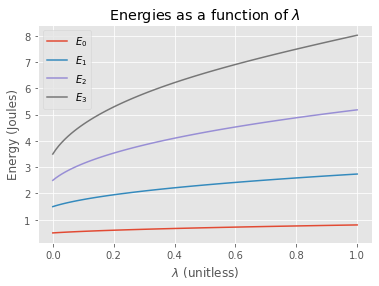

In [ ]:
system_dim = 15
dim = 4
tolerance = .01

n = 100
lambda_list = np.linspace(0,1,n)
energy = np.zeros((n,dim))

for i in range(n):
  H = H_perturbed(system_dim,lambda_list[i])
  d, R = hermitian_eigensystem(H,tolerance)
  energy[i] = d[0:dim]

for i in range(dim):
  plt.plot(lambda_list,energy[:,i],label="$E_{%s}$" %i)
  plt.title("Energies as a function of $\lambda$")
  plt.xlabel("$\lambda$ (unitless)")
  plt.ylabel("Energy (Joules)")

plt.legend()
plt.show()

From this plot we can see that as the value of $\lambda$ increases the difference between sucsessive energy levels grows larger.

Additionally, we can also plot the spacings between adjacent energy levels $\Delta E(\lambda) = E_{n+1}(\lambda) - E_{n}(\lambda)$. This is done in the following code block.

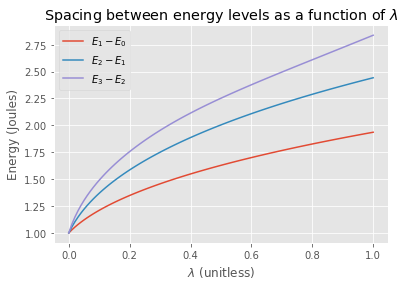

In [ ]:
system_dim = 15
dim = 4
tolerance = .01

diff = np.zeros((dim-1,n))

for i in range(0,dim-1):
  upper_energy = energy[:,i+1]
  lower_energy = energy[:,i]
  diff[i] = upper_energy - lower_energy

for i in range(0,dim-1):
  plt.plot(lambda_list,diff[i], label="$E_{%s} - E_{%s}$" %(i+1, i))
  plt.title("Spacing between energy levels as a function of $\lambda$")
  plt.xlabel("$\lambda$ (unitless)")
  plt.ylabel("Energy (Joules)")
plt.legend()
plt.show()

This plot again helps demonstate that as the value of $\lambda$ increases so too does the spacings between energy levels.

4.) Now, we will check the convergence of our numerical algorithm with respect to the size of our basis, $N$. Again, we will be plotting the first four energy levels, but this time we will vary the size of the basis while keeping $\lambda = 1$.  

The below code block diagonalizes $\hat{H}_{1}$ for $N \in [4,40]$. The lower bound on $N$ must be at least the same as the number of energies we wish to calculate (as otherwise we wouldn't have enough eigenvalues). The upperbound is just a number that we feel is sufficently high to guarantee convergence of the method.

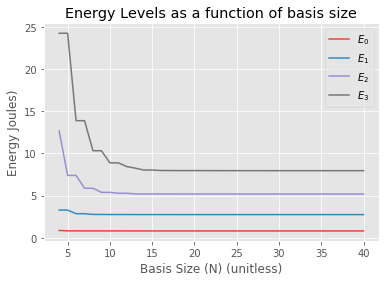

In [ ]:
system_dim = 40
dim = 4
tolerance = .01

N_vals = np.arange(dim,system_dim+1)
#E_vals = np.zeros(np.size(N_vals))
E_vals = np.zeros((np.size(N_vals),dim))
h_lambda = 1

for i in range(np.size(N_vals)):
  H = H_perturbed(N_vals[i],h_lambda)
  d,R = hermitian_eigensystem(H,tolerance)
  E_vals[i] = d[0:dim]

#print(E_vals)

for i in range(dim):
  plt.plot(N_vals,E_vals[:,i],label="$E_{%s}$" %i)
  plt.title("Energy Levels as a function of basis size")
  plt.xlabel("Basis Size (N) (unitless)")
  plt.ylabel("Energy Joules)")
#plt.plot(N_vals,E_vals)
plt.legend()
plt.show()

From the plot we can see that for the first four energy levels the value of the respective energy converges. This is because as $N$ increases the values of the eigenvalues of $\hat{H}_{1}$ become constant. All four energy levels appear to become stable around a basis size of $N = 15$ (the first three energy levels appear to converge at $N = 10$, but at $N = 15$ all four energies become convergant).

5.) Finally, we will plot the the first four wave functions for both the anharmonic oscillator and the unpeturbed harmonic oscillator.

We can recall from our study of quantum mechanics that the wave functions of the harmonic oscillator are:

$$
  \psi_{n}(x) = (2^{n}n!\sqrt{\pi})^{-1/2}e^{-x^{2}/2} h_{n}(x)
$$

where $h_{n}(x)$ is the $n^{th}$ Hermite polynomial. 

Since the wavefunctions of the harmonic oscillator form a basis for the space of the anharmonic oscillator we can represent the wave functions of the anharmonic oscillator as linear combinations of the $\psi_{n}(x)$ listed above. The coefficents of the harmonic oscillator states in the linear combination are simply the components of eigenvectors of the anharmonic oscillator.

The following code block plots the the anharmonic oscillator with $\lambda = 1$ (solid line) and the unpeturbed harmonic oscillator (dashed line).

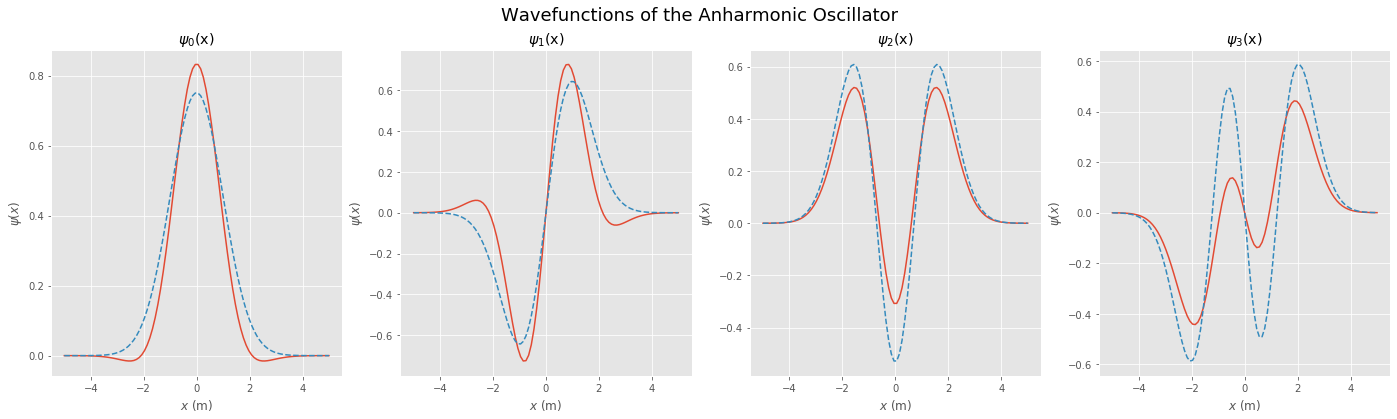

In [ ]:
system_dim = 10
dim = 4
tolerance = .01

x_vals = np.linspace(-5,5,100)

H_0 = H_perturbed(dim,0)
d_0,R_0 = hermitian_eigensystem(H_0,tolerance)

fig, axs = plt.subplots(1,dim,figsize=(6*dim,6))
fig.suptitle("Wavefunctions of the Anharmonic Oscillator",fontsize=18)
A
for i in range(dim):
  psi_i = psi(evecs[:,i])(x_vals)
  psi_0 = psi(R_0[:,i])(x_vals)

  axs[i].plot(x_vals,psi_i)
  axs[i].plot(x_vals,psi_0,linestyle="--")

  axs[i].set_title("$\psi_{" + str(i) + "}$(x)")
  axs[i].set_xlabel("$x$ (m)")
  axs[i].set_ylabel("$\psi(x)$")

These plots show that (at least for the first four wave functions) the anharmonic and unpeturbed oscillator's wave functions share the same general shape/characteristics.